# Random Forest Regressor (RFR)

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
TEST_SIZE = 0.1
RANDOM_SEED = 24

# Default sklearn
N_TREES = 100
N_LEAF_NODES = None
N_DEPTH = None
N_JOBS = 4

### All materials

In [5]:
# Data
df = pd.read_csv('material_data.csv')

columns = list(df.columns)
columns = columns[-31:]
FEATURES = columns

TARGET = ['ef']

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna() 

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X = X.values
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

rf_model = RandomForestRegressor(
    n_estimators=N_TREES,
    max_leaf_nodes=N_LEAF_NODES,
    max_depth=N_DEPTH,
    random_state=RANDOM_SEED,
    n_jobs=N_JOBS,
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

C:\Users\samira23016\AppData\Local\Temp\ipykernel_22472\3671107675.py:2: DtypeWarning: Columns (7024) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('material_data.csv')


Root Mean Squared Error (RMSE): 0.2834
R²: 0.9216
Mean Absolute Error (MAE): 0.1634


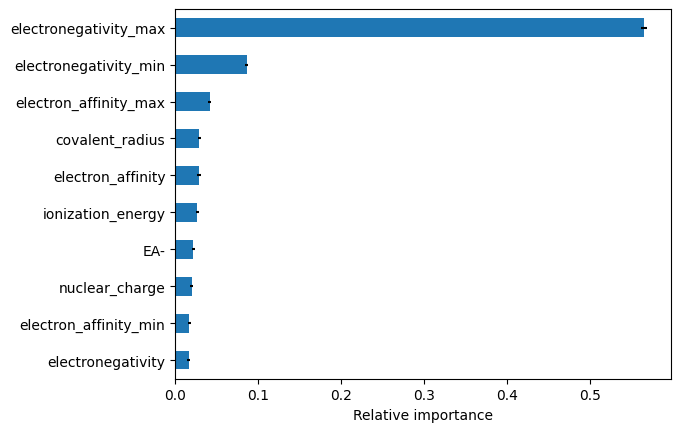

In [7]:
importance = rf_model.feature_importances_
standard_deviation = np.std(
    [tree.feature_importances_ for tree in rf_model.estimators_], axis=0
)

serie_importance = pd.Series(importance, index=FEATURES)
serie_standard_deviation = pd.Series(standard_deviation, index=FEATURES)

serie_importance_10 = serie_importance.nlargest(10)
standard_deviation_10 = serie_standard_deviation[serie_importance_10.index]

serie_importance_10 = serie_importance_10.iloc[::-1]
standard_deviation_10 = standard_deviation_10.iloc[::-1]

fig, axe = plt.subplots()
serie_importance_10.plot.barh(xerr=standard_deviation_10, ax=axe)
axe.set_xlabel("Relative importance")
plt.show()

### Removing theoretical materials

In [6]:
# Data
df = pd.read_csv('material_data.csv')

df = df[df["theoretical"] != True]

columns = list(df.columns)
columns = columns[-31:]
# columns.remove('ef')
FEATURES = columns

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna() 

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X = X.values
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

rf_model_exp = RandomForestRegressor(
    n_estimators=N_TREES,
    max_leaf_nodes=N_LEAF_NODES,
    max_depth=N_DEPTH,
    random_state=RANDOM_SEED,
    n_jobs=N_JOBS,
)

rf_model_exp.fit(X_train, y_train)

y_pred = rf_model_exp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

C:\Users\samira23016\AppData\Local\Temp\ipykernel_22472\1540518091.py:2: DtypeWarning: Columns (7024) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('material_data.csv')


Root Mean Squared Error (RMSE): 0.2812
R²: 0.8963
Mean Absolute Error (MAE): 0.1870


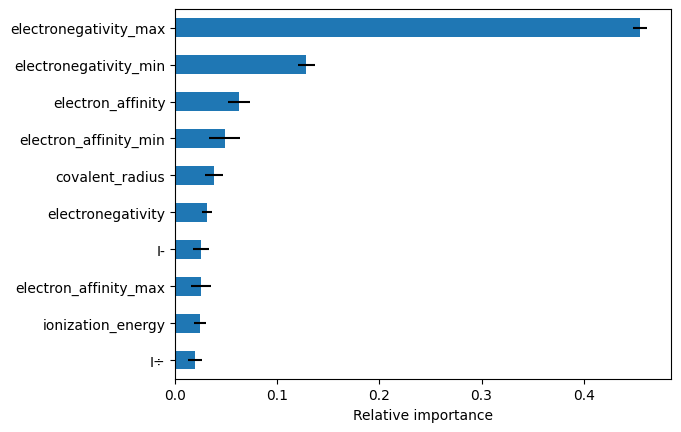

In [8]:
importance = rf_model_exp.feature_importances_
standard_deviation = np.std(
    [tree.feature_importances_ for tree in rf_model_exp.estimators_], axis=0
)

serie_importance = pd.Series(importance, index=FEATURES)
serie_standard_deviation = pd.Series(standard_deviation, index=FEATURES)

serie_importance_10 = serie_importance.nlargest(10)
standard_deviation_10 = serie_standard_deviation[serie_importance_10.index]

serie_importance_10 = serie_importance_10.iloc[::-1]
standard_deviation_10 = standard_deviation_10.iloc[::-1]

fig, axe = plt.subplots()
serie_importance_10.plot.barh(xerr=standard_deviation_10, ax=axe)
axe.set_xlabel("Relative importance")
plt.show()